In [70]:
import numpy as np
import matplotlib.pyplot as plt 

g = 9.81 # m/s^2
atm_pressure = 101325 # Pa
water_density = 1000 # kg/m^3
def calculate_buoyancy(V, density_fluid):
    """Compute and returns the buoyancy of an object in a fluid.
    Args: 
        V (int or float): Volume of liquid displaced/volume of object of object is completely submerged (m^3)
        density_fluid (int or float): The density of the fluid that the object is in/displacing (kg/m^3)
    Returns: 
        Fb (float): The buoyant force applied - calulated using archimedes principal (N)
    """
    if V < 0 or density_fluid < 0:
        raise ValueError("Inputs must be positive.")
    Fb = density_fluid * V * g
    return Fb

def will_it_float(V, mass):
    """Determins if an object will float or sink in water.
    Args:
        V (float): Volume of liquid displaced/volume of object of object is completely submerged (m^3)
        mass (float): Mass of the object on Earth (kg)
    Returns:
        (boolean): True if floats, False if sinks
    """
    if V < 0 or mass < 0:
        raise ValueError("Inputs must be positive.")
    if calculate_buoyancy(V, water_density) > (mass * g):
        return True
    if calculate_buoyancy(V, water_density) < (mass * g):
        return False
    else:
        pass

def calculate_pressure(depth):
    """Compute and returns the pressure exerted on an object at a specified depth. 
    Args: 
        depth (int / float): depth of object in water (m)
    Returns:
        pressure (int / float): the pressure exerted on the object by the fluid (Pa)
    """
    if depth < 0:
        raise ValueError("Input must be positive.")
    pressure = water_density * g * depth + atm_pressure
    return pressure # Pa

def calculate_acceleration(force, mass):
    """Calculates and returns acceleration of an object.
    Args:
        force (int / float): Force applied to object in Newtons.
        mass (int / float): Mass of object in kg.
    Returns:
        float: Acceleration of object with the given force and mass.
    """
    if not all(isinstance(val, (int, float)) for val in (force, mass)):
        raise ValueError("Invalid input value(s).")
    if force <= 0 or mass <= 0:
        raise ValueError("Invalid input value(s).")
    acceleration = force / mass
    return acceleration  # m/s^2

def calculate_angular_acceleration(torque, moment_of_inertia):
    """Calculates angular acceleration of an object.
    Args:
        torque (int / float): Torque applied to object in Nm.
        moment_of_inertia (int / float): Moment of inertia of object in kg * m^2.
    Returns:
        float: Angular acceleration of the object.
    """
    if not all(isinstance(val, (int, float)) for val in (torque, moment_of_inertia)):
        raise ValueError("Invalid input value(s).")
    if torque <= 0 or moment_of_inertia <= 0:
        raise ValueError("Invalid input value(s).")
    angular_acceleration = torque / moment_of_inertia
    return angular_acceleration

def calculate_torque(force_magnitude, force_direction, distance):
    """Calculates and returns torque applied to an object.
    Args:
        force_magnitude (int / float): Magnitude of force applied to object (N).
        force_direction (int / float): Direction of force applied to object in degrees.
        distance (int / float): Distance of axis of rotation to point where force is applied in meters.
    Returns:
        float: Torque applied to the object.
    Raises:
        ValueError: If the force magnitude or distance is negative.
    """
    if force_magnitude < 0 or distance < 0:
        raise ValueError("Magnitude of the force and distance must be positive.")
    torque = distance * force_magnitude * np.sin(np.deg2rad(force_direction))
    return torque

def calculate_moment_of_inertia(mass, distance):
    """Calculates and returns moment of inertia of a given object.
    Args:
        mass (int / float): Mass of object (kg).
        distance (int / float): Distance from axis of rotation to center of mass of object (m).
    Returns:
        float: Moment of inertia of the object.
    """
    if mass < 0 or distance < 0:
        raise ValueError("Input must be positive.")
    moment_of_inertia = mass * (distance**2)
    return moment_of_inertia

def calculate_auv_acceleration(force_magnitude, force_angle, mass=100, volume=0.1, thruster_distance=0.5):
    """Calculates acceleration of AUV in a 2D plane.
    Args:
        force_magnitude (int / float): Magnitude of force applied by thruster (N).
        force_angle (int / float): Angle of force applied by thruster from x-axis (radians).
        mass (int / float): Mass of AUV (kg), default 100.
        volume (int / float): Volume of AUV (m^3), default 0.1.
        thruster_distance (int / float): Distance from center of mass of AUV to thruster (m), default 0.5.
    Returns:
        float: Net acceleration of the AUV.
    """
    if not all(isinstance(val, (int, float)) for val in (force_magnitude, force_angle, mass, volume, thruster_distance)):
        raise ValueError("Invalid input value(s).")
    if force_magnitude > 100 or force_magnitude < 0:
        raise ValueError("Value is out of thruster capabilities.")
    if force_angle > (np.pi / 6) or force_angle < (-np.pi / 6):
        raise ValueError("Angle of thruster may not be greater than pi/6 radians in either direction.")
    ay = force_magnitude * np.sin(force_angle) / mass
    ax = force_magnitude * np.cos(force_angle) / mass
    net_acceleration = np.sqrt(ay**2 + ax**2)
    return net_acceleration

def calculate_auv_angular_acceleration(force_magnitude, force_angle, inertia=1, thruster_distance=0.5):
    """Calculates angular acceleration of AUV in a 2D plane.
    Args:
        force_magnitude (int / float): Magnitude of force applied by thruster (N).
        force_angle (int / float): Angle of force applied by thruster from x-axis (radians).
        inertia (int / float): Moment of inertia of AUV (kg * m^2), default 1.
        thruster_distance (int / float): Distance from center of mass of AUV to thruster (m), default 0.5.
    Returns:
        float: Angular acceleration of the AUV.
    """
    if not all(isinstance(val, (int, float)) for val in (force_magnitude, force_angle, inertia, thruster_distance)):
        raise ValueError("Input value(s) must be either float or int.")
    if force_magnitude > 100 or force_magnitude < 0:
        raise ValueError("Value is out of thruster capabilities.")
    if force_angle > (np.pi / 6) or force_angle < (-np.pi / 6):
        raise ValueError("Angle of thruster may not be greater than pi/6 radians in either direction.")
    angular_acceleration = (force_magnitude * np.sin(force_angle) * thruster_distance) / inertia
    return angular_acceleration

def calculate_auv2_acceleration(T, alpha, theta, mass=100):
    """Calculates the acceleration of the AUV in a 2D plane.
    Args:
        T (np.ndarray): Array of length 4 containing the magnitudes of forces applied by the thrusters (N).
        alpha (int / float): Angle of thrusters (radians).
        theta (int / float): Angle of AUV (radians).
        mass (int / float): Mass of AUV (kg), default 100.
    Returns:
        float: Acceleration of the AUV.
    """
    if not isinstance(T, np.ndarray):
        raise TypeError("Forces array must be an array.")
    if T.shape != (4, 1):
        raise ValueError("Forces array must be an array of shape 4 x 1.")
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    component_arr = np.array([[cos_alpha, cos_alpha, -cos_alpha, -cos_alpha],
                              [sin_alpha, -sin_alpha, -sin_alpha, sin_alpha]])

    forcesprime_arr = np.matmul(component_arr, T)
    forces_arr = np.matmul(rotation_matrix, forcesprime_arr)
    accel_arr = forces_arr / mass
    return accel_arr

def calculate_auv2_angular_acceleration(T, alpha, L, l, inertia=100):
    """Calculates and returns angular acceleration of the AUV.
    Args:
        T (np.ndarray): Array of length 4 containing the magnitudes of forces applied by thrusters (N).
        alpha (int / float): Angle of thrusters in radians.
        L (int / float): Distance from center of mass (m).
        l (int / float): Distance from center of mass (m).
        inertia (int / float): Moment of inertia of AUV (kg * m^2).
    Returns:
        float: Angular acceleration of the AUV.
    """
    if not isinstance(T, np.ndarray):
        raise TypeError("Forces array must be an array.")
    if T.shape != (4, 1):
        raise ValueError("Forces array must be shape 4 x 1")

    r = np.sqrt(np.power(l, 2) + np.power(L, 2))
    beta = np.arctan(L / l)
    torque = T[0][0] - T[1][0] + T[2][0] - T[3][0]
    angle_accel = np.sin(alpha + beta) * r * torque / inertia
    return angle_accel

def simulate_auv2_motion(T, alpha, L, l, mass = 100, inertia = 1000, dt = 0.1, t_final = 10, x0 = 0, y0 = 0, theta0 = 0):
    state = np.array([[x0], [y0], [theta0]]) # x, y, heading
    t = np.arange(0, (t_final), dt)
    position = np.tile(np.zeros_like(t), (2, 1))
    theta = np.zeros_like(t)
    v = np.tile(np.zeros_like(t), (2, 1))
    omega = np.zeros_like(t)
    angular_acceleration = np.zeros_like(t)
    a = np.tile(np.zeros_like(t), (2, 1))

    for i in range(1, len(t)):
        angular_acceleration[i] = calculate_auv2_angular_acceleration(T, alpha, L, l, inertia)
        omega[i] = angular_acceleration[i-1] * dt + omega[i-1]
        theta[i] = omega[i-1] * dt + theta[i-1]
        a[0][i] = calculate_auv2_acceleration(T, alpha, theta[i-1], mass)[0][0]
        a[1][i] = calculate_auv2_acceleration(T, alpha, theta[i-1], mass)[1][0]
        v[0][i] = a[0][i-1] * dt + v[0][i-1]
        v[1][i] = a[1][i-1] * dt + v[1][i-1]
        position[0][i] = v[0][i-1] * dt + position[0][i]
        position[1][i] = v[1][i-1] * dt + position[1][i]
    x = position[0]
    y = position[1]

    auvDict = {
        "Time" : t,
        "XPosition" : x,
        "YPosition" : y,
        "theta:" : theta,
        "velocity" : v,
        "angularVelocity" : omega,
        "acceleration" : a
    }

    return auvDict


In [71]:
def plot_auv2_motion(auvDict):
    x = auvDict["XPosition"]
    y = auvDict["YPosition"]

    plt.plot(x, y)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("AUV Positions")
    plt.grid(True)
    plt.show()

In [72]:
# auvDict = simulate_auv2_motion(np.array([[0], [50], [0], [50]]), np.pi/4, 1, 1, 1)
# x = auvDict["XPosition"]
# y = auvDict["YPosition"]

# plt.plot(x, y)
# plt.xlabel("X Position")
# plt.ylabel("Y Position")
# plt.title("AUV Positions")
# plt.grid(True)
# plt.show()

In [75]:
simulate_auv2_motion(np.array([[0], [50], [50], [30]]), np.pi/4, 1, 1, 1)

{'Time': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
        7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
        9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
 'XPosition': array([  0.        ,   0.        ,   0.        ,  -0.21213203,
         -0.42426407,  -0.6363961 ,  -0.84852814,  -1.06066017,
         -1.27279221,  -1.48492424,  -1.69705627,  -1.90918831,
         -2.12132034,  -2.33345238,  -2.54558441,  -2.75771645,
         -2.96984848,  -3.18198052,  -3.39411255,  -3.60624458,
         -3.81837662,  -4.03050865,  -4.24264069,  -4.45477272,
         -4.66690476,  -4.879

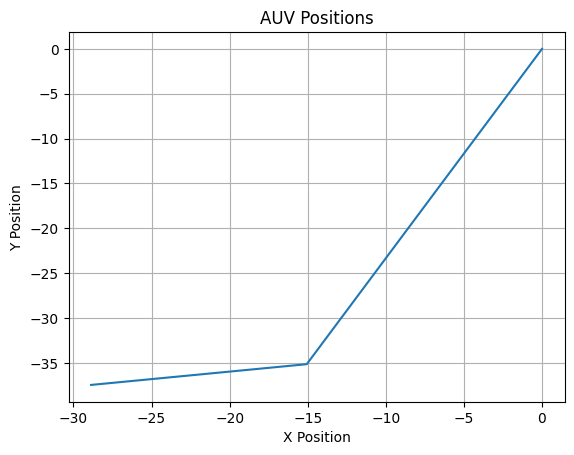

In [74]:
auvDict = simulate_auv2_motion(np.array([[0], [50], [50], [30]]), np.pi/4, 1, 1, 1)
plot_auv2_motion(auvDict)